zavrseno: {i}
zavrseno: {i}
zavrseno: {i}
zavrseno: {i}


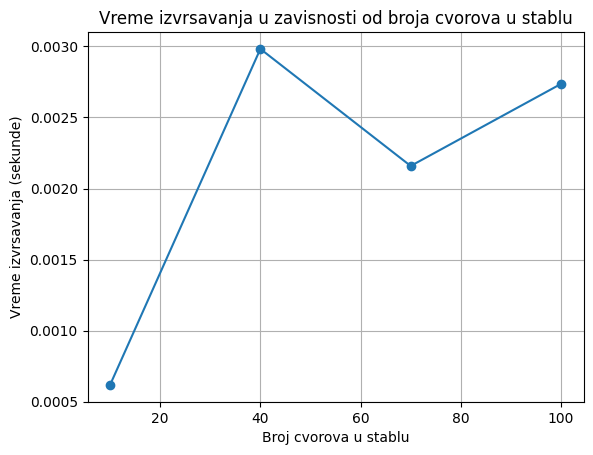

In [13]:
import matplotlib.pyplot as plt
from itertools import combinations
import networkx as nx
import time
import random 


def contains_isomorphic_subtree(graph, H):
    for h in H:
        for sub_nodes in combinations(graph.nodes(), len(h.nodes())):
            subgraph = graph.subgraph(sub_nodes)
            if nx.is_isomorphic(subgraph, h):
                return True
    return False

def maximum_subforest_greedy(T, H):
    subforest = nx.Graph()
    subforest.add_node(list(T.nodes())[0])
    edges = list(T.edges())
    edges.sort(key=lambda edge: T.degree(edge[0]) + T.degree(edge[1]), reverse=True)

    for edge in edges:
        subforest.add_edge(*edge)
        if not nx.is_connected(subforest) or contains_isomorphic_subtree(subforest, H):
            subforest.remove_edge(*edge)
    
    for node in list(subforest.nodes()):
        if subforest.degree(node) == 0:
            subforest.remove_node(node)
        
    return subforest



def generate_instance(N, num_of_subtrees):
    T = nx.random_tree(N)
    H = []
    nodes = list(T.nodes)

    for i in range(num_of_subtrees):
        subtree_nodes = random.sample(nodes, 10)
        subtree = T.subgraph(subtree_nodes).copy()
        if nx.is_connected(subtree):
            H.append(subtree)
    return T, H



def merenje_vremena(maximum_subforest_function, tree_sizes, num_of_subtrees):
    times = []
    i = 1
    for N in tree_sizes:
        T, H = generate_instance(N, num_of_subtrees)
        start = time.time()
        subforest = maximum_subforest_function(T, H)
        print("zavrseno: {i}")
        i = i+1
        end = time.time()

        time_elapsed = end - start
        times.append(time_elapsed)

    return times

tree_sizes = [10, 40, 70, 100]
times = merenje_vremena(maximum_subforest_greedy, tree_sizes, 5)

plt.plot(tree_sizes, times, marker='o')
plt.xlabel('Broj cvorova u stablu')
plt.ylabel('Vreme izvrsavanja (sekunde)')
plt.title('Vreme izvrsavanja u zavisnosti od broja cvorova u stablu')
plt.grid(True)
plt.show()